## CLEANSE THE DATASET

In [82]:
# import libraries

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
data = pd.read_csv('/content/sample_data/Cars_Datasets_2025.csv', encoding = 'latin1')
data.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


In [84]:
#check null data
data.isnull().sum()

,0
Company Names,0
Cars Names,0
Engines,0
CC/Battery Capacity,3
HorsePower,0
Total Speed,0
Performance(0 - 100 )KM/H,6
Cars Prices,0
Fuel Types,0
Seats,0


In [85]:
#drop null data
df_dropped = data.dropna()
df_dropped.isnull().sum()

,0
Company Names,0
Cars Names,0
Engines,0
CC/Battery Capacity,0
HorsePower,0
Total Speed,0
Performance(0 - 100 )KM/H,0
Cars Prices,0
Fuel Types,0
Seats,0


In [86]:
#check nan value
df_dropped.isna().sum()

,0
Company Names,0
Cars Names,0
Engines,0
CC/Battery Capacity,0
HorsePower,0
Total Speed,0
Performance(0 - 100 )KM/H,0
Cars Prices,0
Fuel Types,0
Seats,0


In [87]:
# Correct the fuel type and punctuation
# Mapping variations to standardized names
replace_dict = {
    "CNG/Petrol": "Petrol",
    "Diesel": "Diesel",
    "Diesel Hybrid": "Diesel Hybrid",
    "Diesel/Petrol": "Diesel Petrol",
    "Electric": "Electric",
    "Hydrogen": "Hydrogen",
    "Gas / Hybrid": "Hybrid",
    "Hybrid": "Hybrid",
    "Hybrid (Gas + Electric)": "Hybrid",
    "Hybrid (Petrol)": "Hybrid",
    "Hybrid/Electric": "Hybrid",
    "Hybrid/Petrol": "Hybrid",
    "Hybrid / Plug-in": "Plug-in Hybrid",
    "plug in hyrbrid": "Plug-in Hybrid",
    "Plug-in Hybrid": "Plug-in Hybrid",
    "Petrol": "Petrol",
    "Petrol (Hybrid)": "Hybrid",
    "Petrol, Diesel": "Diesel Petrol",
    "Petrol/Diesel": "Diesel Petrol",
    "Petrol/AWD": "Petrol",
    "Petrol/EV": "Hybrid",
    "Petrol/Hybrid": "Hybrid",
    "Petrol, Hybrid": "Hybrid"
}

# Apply the mapping to df_dropped
df_dropped['Fuel Types'] = df_dropped['Fuel Types'].map(replace_dict)

# Optional: Check the cleaned unique values
print(df_dropped['Fuel Types'].value_counts())

Fuel Types
Petrol            874
Hybrid            106
Diesel            102
Electric           95
Diesel Petrol      23
Plug-in Hybrid      7
Hydrogen            3
Name: count, dtype: int64


/tmp/ipython-input-87-1050617583.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['Fuel Types'] = df_dropped['Fuel Types'].map(replace_dict)


In [88]:
df_dropped.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",Plug-in Hybrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


In [89]:
# Change the prices format to be one format

def clean_price(price):
    if isinstance(price, str):
        # Remove $ and ,
        price_clean = price.replace('$', '').replace(',', '').strip()

        # Check for range using common separators
        # '-', '/', 'to' (case-insensitive), etc.
        if any(sep in price_clean for sep in ['-', '/', 'to']):
            # Use regex to extract all numbers in the string
            nums = [int(num) for num in re.findall(r'\d+', price_clean)]
            if nums:
                avg_price = sum(nums) // len(nums)
                return avg_price
            else:
                return np.nan
        else:
            # Single price
            try:
                return int(price_clean)
            except:
                return np.nan
    elif isinstance(price, (int, float)):
        return int(price)
    else:
        return np.nan

# Apply to your dataframe
df_dropped['Cars Prices'] = df_dropped['Cars Prices'].apply(clean_price)

# Check cleaned values
print(df_dropped['Cars Prices'].head())

0    1100000.0
1     460000.0
2      13500.0
3     161000.0
4     253290.0
Name: Cars Prices, dtype: float64


/tmp/ipython-input-89-3812574030.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['Cars Prices'] = df_dropped['Cars Prices'].apply(clean_price)


In [90]:
# Change the performance format

def clean_performance(val):
    if isinstance(val, str):
        # Remove 'sec', spaces, and handle cases like '10. 5 sec'
        val_clean = val.lower().replace('sec', '').replace(' ', '').strip()
        val_clean = val_clean.replace(',', '.')  # if any commas accidentally exist
        try:
            return float(val_clean)
        except:
            # Use regex as fallback
            match = re.search(r'\d+\.?\d*', val_clean)
            if match:
                return float(match.group())
            else:
                return np.nan
    elif isinstance(val, (int, float)):
        return float(val)
    else:
        return np.nan

# Apply to your dataframe
df_dropped['Performance(0 - 100 )KM/H'] = df_dropped['Performance(0 - 100 )KM/H'].apply(clean_performance)

# Check the cleaned values
print(df_dropped['Performance(0 - 100 )KM/H'].unique())

[ 2.5  5.3 10.5  3.2  3.6  2.9  4.   3.4  4.1  6.4  5.6  6.7  6.9  4.7
  7.3  5.8  8.2  7.5  6.5  6.8  5.9  3.9  4.5  4.2  2.8  3.   3.1  3.3
  4.8  4.4  4.9  5.2  4.3  5.1  5.5  5.7  6.1  3.7  3.5  5.4  6.3  3.8
  8.5 10.3 10.9  8.4  7.1 12.2 11.2  8.9  7.7  7.2  8.   8.3  7.9  8.1
  6.   9.4  9.5  9.2  6.2 10.2  7.6 11.5  5.   9.  10.  11.  14.8 13.5
  9.3  7.4  9.8  7.8 13.   7.   4.6  8.8 14.3 12.9 10.8 23.  17.5 11.7
 10.4  8.6 12.4  9.6  9.9  8.7 12.  11.9 14.5 10.7 10.6  6.6 10.1 13.7
 12.5 15.  14.  12.3 12.8 18.  18.5 13.8  2.7  2.6 29.  16.  16.5 17.
 17.6  2.1  1.9  9.1  2.3  2.4  2.2 20.  22.   9.7 15.5 35. ]


/tmp/ipython-input-90-1755670726.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['Performance(0 - 100 )KM/H'] = df_dropped['Performance(0 - 100 )KM/H'].apply(clean_performance)


In [91]:
# Change horsepower value

def clean_horsepower(val):
    if isinstance(val, str):
        val_clean = val.lower().replace('hp', '').replace('~', '').replace(' ', '').replace(',', '')
        # Check if it is a range
        if '-' in val_clean:
            try:
                parts = val_clean.split('-')
                nums = [float(re.findall(r'\d+\.?\d*', p)[0]) for p in parts if re.findall(r'\d+\.?\d*', p)]
                if nums:
                    return sum(nums) / len(nums)
                else:
                    return np.nan
            except:
                return np.nan
        else:
            match = re.findall(r'\d+\.?\d*', val_clean)
            if match:
                return float(match[0])
            else:
                return np.nan
    elif isinstance(val, (int, float)):
        return float(val)
    else:
        return np.nan

# Apply to your dataframe
df_dropped['HorsePower'] = df_dropped['HorsePower'].apply(clean_horsepower)

# Check the cleaned output
print(df_dropped['HorsePower'].unique())

[ 963.   563.    77.5  630.   602.   710.   656.   550.   750.   789.
  592.   612.   382.   205.   228.   381.   600.   332.   400.   188.
  300.   149.   201.   284.   310.  1160.  1000.   715.   503.   542.
  580.   540.   836.   819.   759.   640.   740.   641.   610.   700.
  769.   671.   591.   624.   496.   603.   429.   362.   416.   402.
  255.   627.   493.   444.   523.   623.   335.   349.   306.   248.
  369.   136.   261.   302.   116.   190.   109.   150.   178.   224.
   95.   102.   163.   247.   295.   187.   240.   315.   192.   227.
  285.   180.   301.   139.   121.   203.   270.   159.   151.   245.
  219.   282.   344.   106.   144.   218.   236.   168.   140.   119.
  158.    87.    99.   147.   155.    83.   103.   220.   305.   437.
  169.   152.   296.   204.   184.   114.    71.   406.   134.   241.
  268.   253.   225.   281.   320.   291.   191.   120.   200.   275.
  161.   278.   160.   215.   189.   251.5   82.   365.5  202.5  157.5
  210.5  207.5  185

/tmp/ipython-input-91-3583589940.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['HorsePower'] = df_dropped['HorsePower'].apply(clean_horsepower)


In [92]:
# Clean battery values and format it

def clean_cc_battery(val):
    if pd.isnull(val):
        return np.nan

    val = val.lower().replace(',', '')
    parts = re.split(r'/|-', val)  # split by / or -
    cc_values = []

    for part in parts:
        part = part.strip()

        # Check if kwh present, convert to cc
        if 'kwh' in part:
            nums = [float(n) for n in re.findall(r'\d+\.?\d*', part)]
            cc_values.extend([n * 30 for n in nums])  # Convert kWh to cc
        else:
            nums = [float(n) for n in re.findall(r'\d+\.?\d*', part)]
            cc_values.extend(nums)

    return np.mean(cc_values) if cc_values else np.nan

# Apply to your dataframe
df_dropped['CC_cleaned'] = df_dropped['CC/Battery Capacity'].apply(clean_cc_battery)

# Check result
print(df_dropped[['CC/Battery Capacity', 'CC_cleaned']].head())

  CC/Battery Capacity  CC_cleaned
0             3990 cc      3990.0
1             6749 cc      6749.0
2            1,200 cc      1200.0
3            3,982 cc      3982.0
4            5,204 cc      5204.0


/tmp/ipython-input-92-2921217976.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['CC_cleaned'] = df_dropped['CC/Battery Capacity'].apply(clean_cc_battery)


In [93]:
# Change the different value in torque column to be in one same format

def clean_torque(val):
    if pd.isnull(val):
        return np.nan
    val_clean = val.lower().replace('nm', '').replace(',', '').replace('+', '').strip()

    # If contains '/', take the average of both
    if '/' in val_clean:
        parts = val_clean.split('/')
        nums = []
        for part in parts:
            nums.extend([float(n) for n in re.findall(r'\d+\.?\d*', part)])
        return np.mean(nums) if nums else np.nan

    # If contains '-', take the average of range
    elif '-' in val_clean:
        nums = [float(n) for n in re.findall(r'\d+\.?\d*', val_clean)]
        return np.mean(nums) if nums else np.nan

    # Else, extract single number
    else:
        match = re.findall(r'\d+\.?\d*', val_clean)
        return float(match[0]) if match else np.nan

# Apply to your dataframe
df_dropped['Torque_cleaned'] = df_dropped['Torque'].apply(clean_torque)

# Check results
print(df_dropped[['Torque', 'Torque_cleaned']].head())

         Torque  Torque_cleaned
0        800 Nm           800.0
1        900 Nm           900.0
2  100 - 140 Nm           120.0
3        900 Nm           900.0
4        560 Nm           560.0


/tmp/ipython-input-93-3745284435.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['Torque_cleaned'] = df_dropped['Torque'].apply(clean_torque)


In [94]:
# Clean seats column that has special character and make it to be integer type

def clean_seats(value):
    if isinstance(value, str):
        if '+' in value:
            parts = value.split('+')
            try:
                return int(parts[0].strip()) + int(parts[1].strip())
            except:
                return None
        elif '-' in value:
            parts = value.split('-')
            try:
                return max(int(parts[0].strip()), int(parts[1].strip()))
            except:
                return None
        else:
            try:
                return int(value.strip())
            except:
                return None
    else:
        try:
            return int(value)
        except:
            return None

df_dropped['Seats_cleaned'] = df_dropped['Seats'].apply(clean_seats).astype('Int64')

print(df_dropped['Seats_cleaned'].value_counts())

Seats_cleaned
5     691
4     166
7     147
2     131
8      29
6      20
3      14
1       3
12      1
9       1
Name: count, dtype: Int64


/tmp/ipython-input-94-1479983769.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['Seats_cleaned'] = df_dropped['Seats'].apply(clean_seats).astype('Int64')


## EDA

/tmp/ipython-input-95-3150690378.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped[col] = pd.to_numeric(df_dropped[col], errors='coerce')


        Cars Prices   HorsePower    CC_cleaned  Torque_cleaned  \
count  1.206000e+03  1210.000000   1208.000000     1210.000000   
mean   1.388516e+05   305.714876   2902.227111      506.903306   
std    7.142252e+05   213.856930   1819.562231     1052.416055   
min    4.000000e+03    26.000000     37.200000       45.000000   
25%    2.800000e+04   154.000000   1598.000000      250.000000   
50%    4.264750e+04   254.000000   2400.000000      370.000000   
75%    7.000000e+04   400.000000   3600.000000      560.000000   
max    1.800000e+07  1850.000000  16100.000000    15590.000000   

       Performance(0 - 100 )KM/H  
count                1210.000000  
mean                    7.562149  
std                     3.305742  
min                     1.900000  
25%                     5.225000  
50%                     7.100000  
75%                     9.500000  
max                    35.000000  


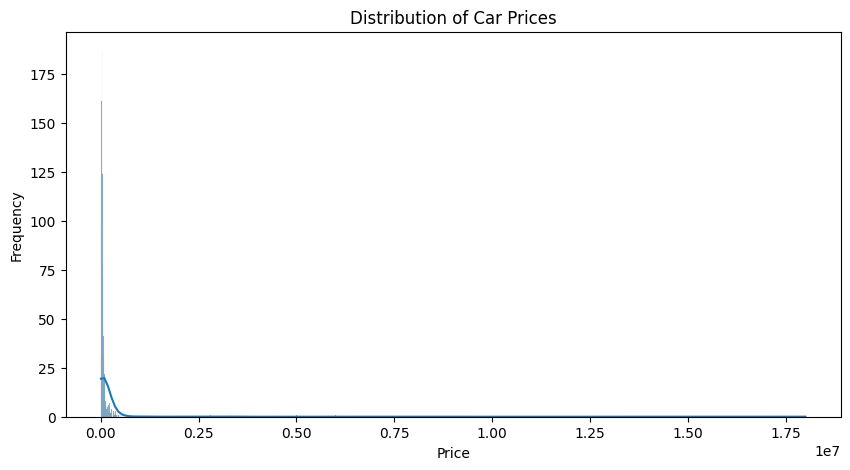

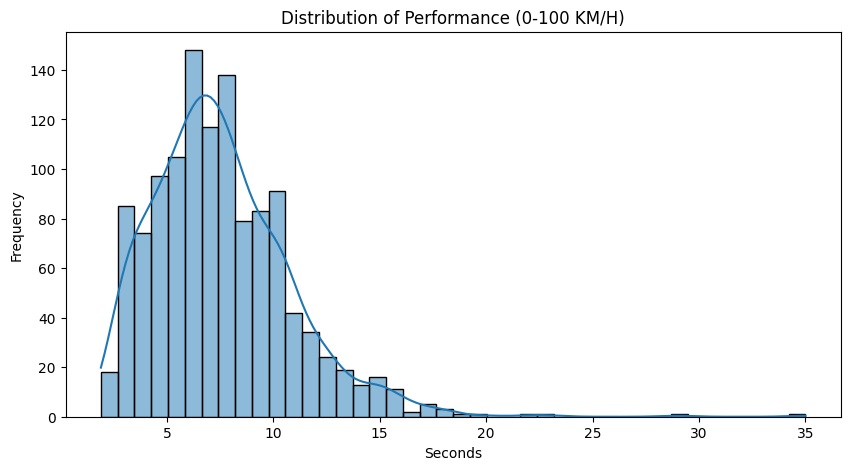

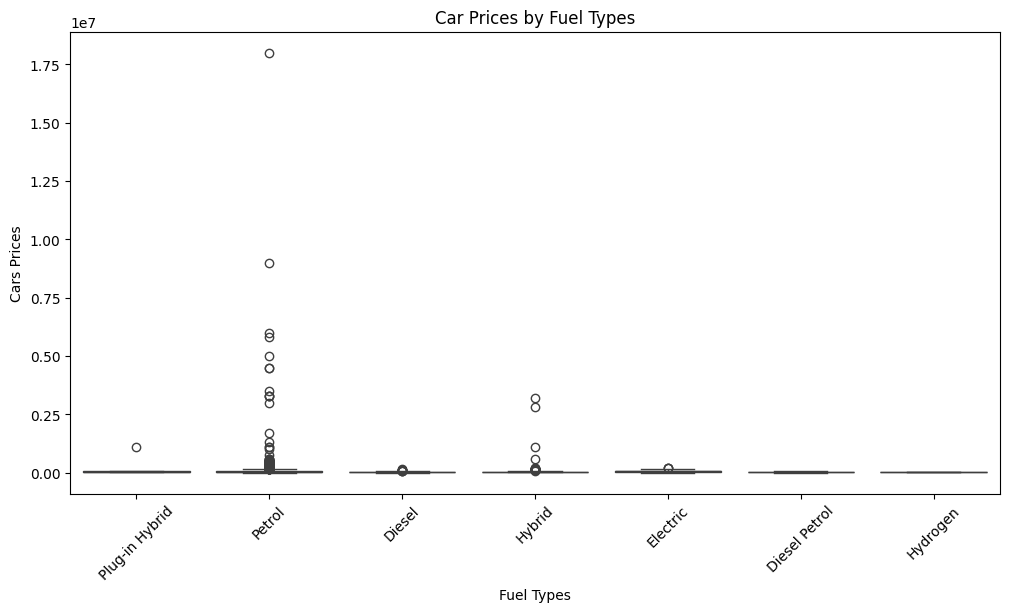

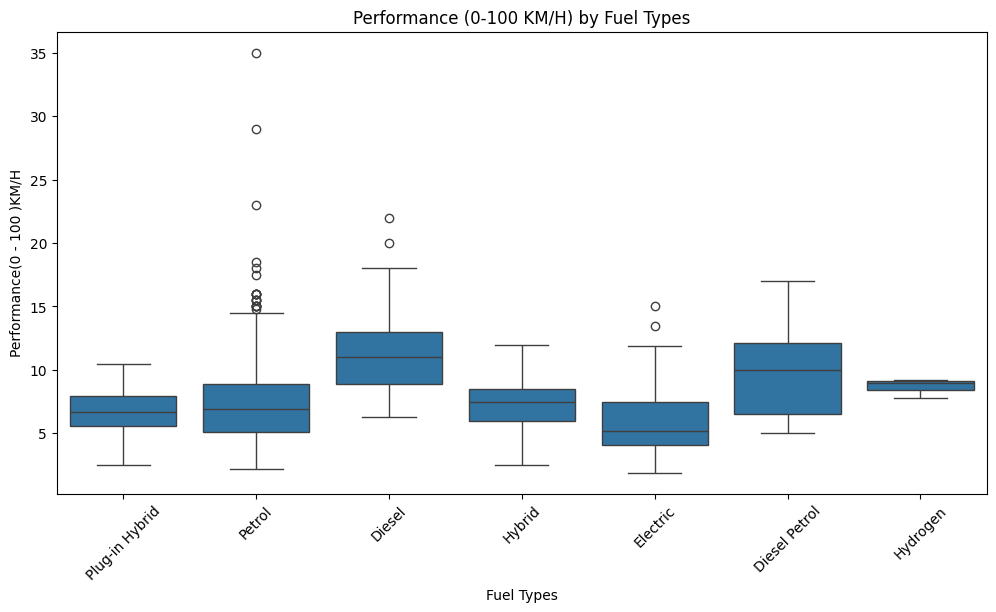

In [95]:
# Load your cleaned dataframe (replace with your actual path if needed)
# Ensure relevant columns are numeric
cols_to_numeric = ['Cars Prices', 'HorsePower', 'CC_cleaned', 'Torque_cleaned', 'Performance(0 - 100 )KM/H']
for col in cols_to_numeric:
    df_dropped[col] = pd.to_numeric(df_dropped[col], errors='coerce')


# Descriptive Statistics
print(df_dropped[cols_to_numeric].describe())

# Distribution Plots
plt.figure(figsize=(10,5))
sns.histplot(df_dropped['Cars Prices'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df_dropped['Performance(0 - 100 )KM/H'], kde=True)
plt.title('Distribution of Performance (0-100 KM/H)')
plt.xlabel('Seconds')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=df_dropped, x='Fuel Types', y='Cars Prices')
plt.xticks(rotation=45)
plt.title('Car Prices by Fuel Types')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=df_dropped, x='Fuel Types', y='Performance(0 - 100 )KM/H')
plt.xticks(rotation=45)
plt.title('Performance (0-100 KM/H) by Fuel Types')
plt.show()

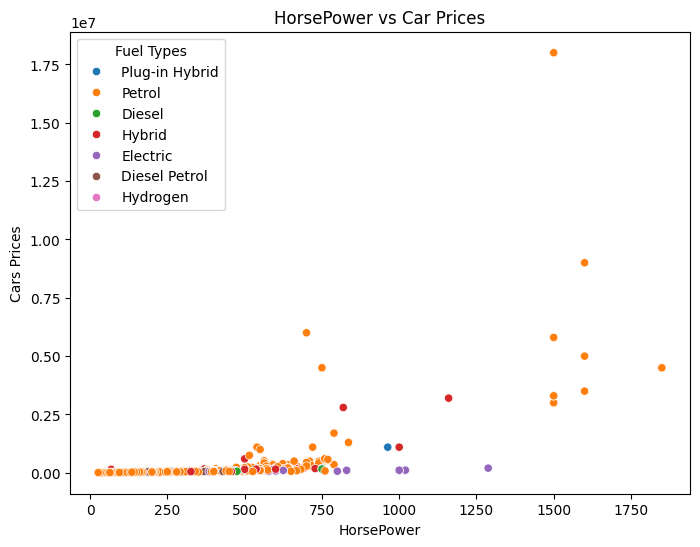

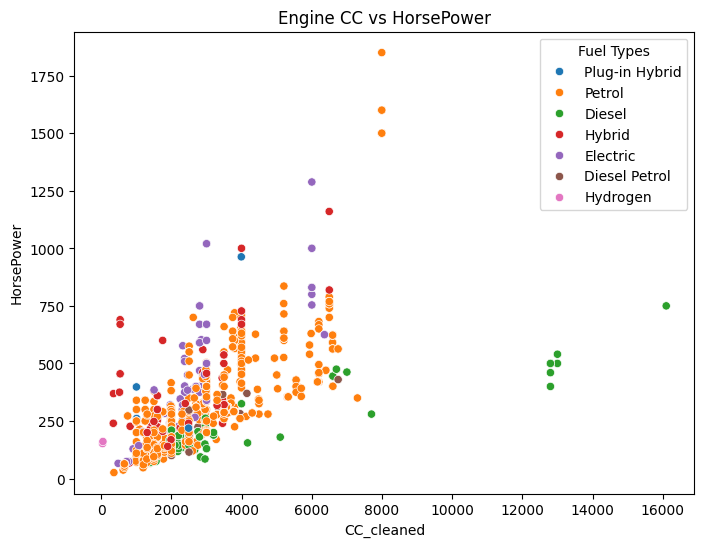

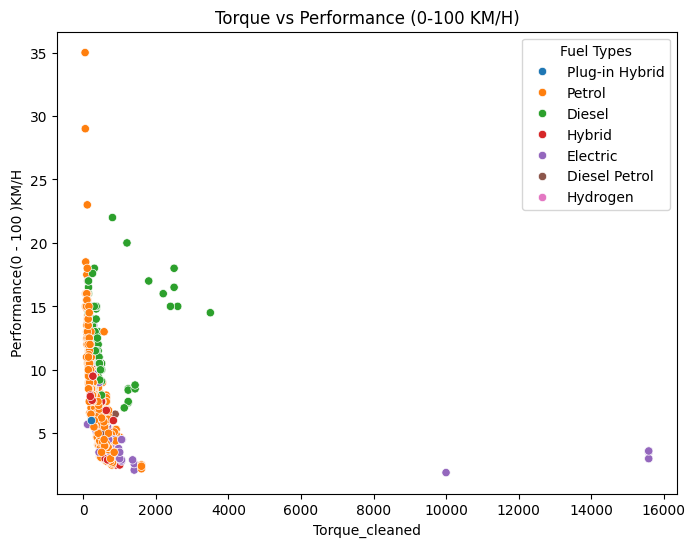

In [96]:
# Scatter Plots
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_dropped, x='HorsePower', y='Cars Prices', hue='Fuel Types')
plt.title('HorsePower vs Car Prices')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_dropped, x='CC_cleaned', y='HorsePower', hue='Fuel Types')
plt.title('Engine CC vs HorsePower')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_dropped, x='Torque_cleaned', y='Performance(0 - 100 )KM/H', hue='Fuel Types')
plt.title('Torque vs Performance (0-100 KM/H)')
plt.show()

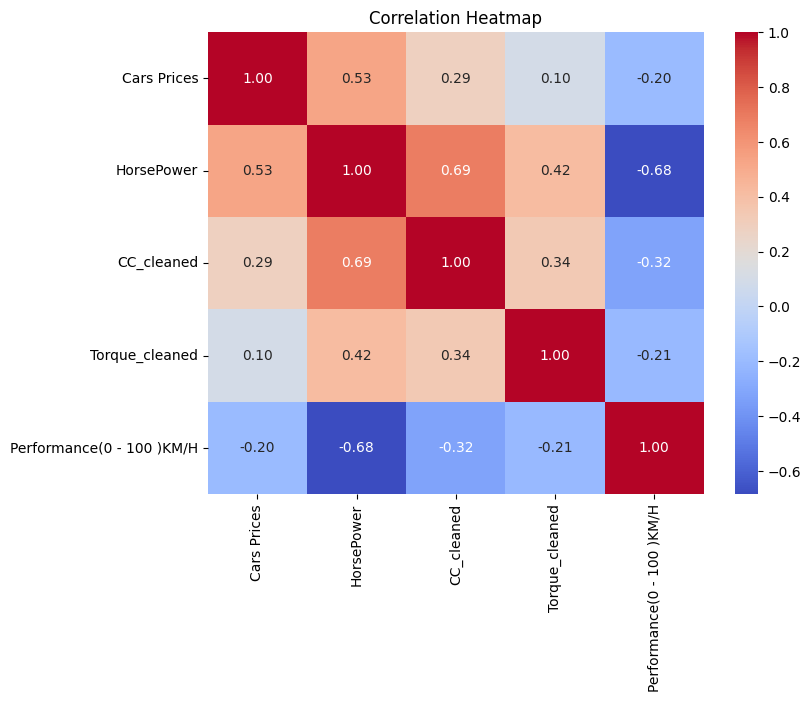

In [97]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
corr = df_dropped[['Cars Prices','HorsePower','CC_cleaned','Torque_cleaned','Performance(0 - 100 )KM/H']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

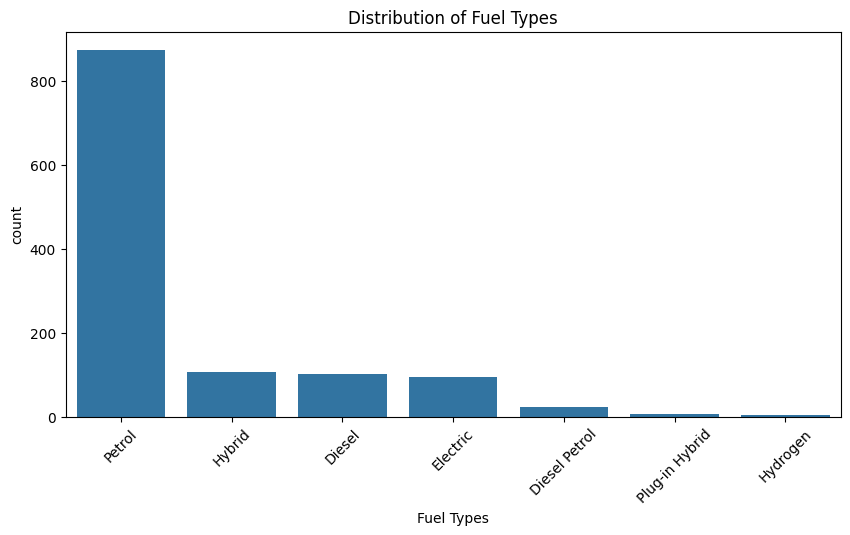

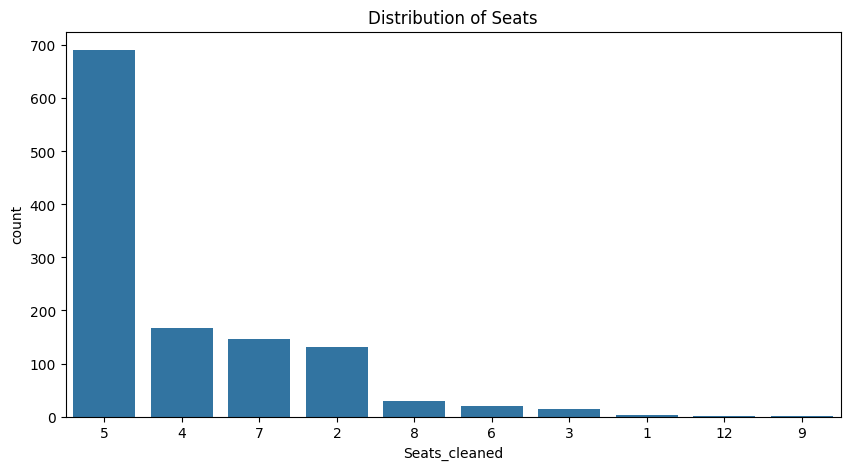

In [98]:
# Fuel Type and Seat Distribution
plt.figure(figsize=(10,5))
sns.countplot(data=df_dropped, x='Fuel Types', order=df_dropped['Fuel Types'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Fuel Types')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=df_dropped, x='Seats_cleaned', order=df_dropped['Seats_cleaned'].value_counts().index)
plt.title('Distribution of Seats')
plt.show()

## ANALYZE

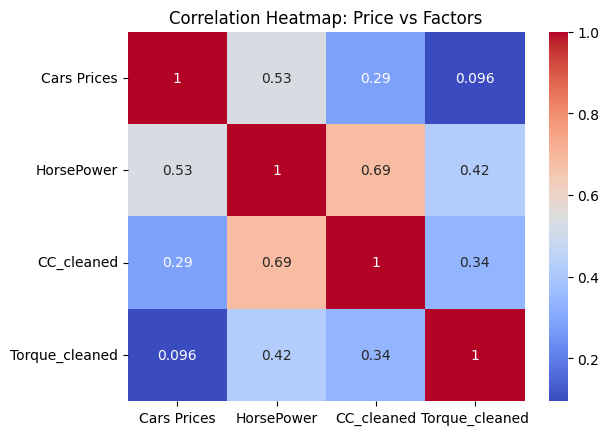

In [99]:
# Car prices analyze by its factors
# Correlation heatmap for numerical factors
numerical_cols = ['Cars Prices', 'HorsePower', 'CC_cleaned', 'Torque_cleaned']
sns.heatmap(df_dropped[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Price vs Factors')
plt.show()

Fuel_Category
EV         68431.105263
Hybrid    134883.165138
Other     145959.864271
Name: Cars Prices, dtype: float64


/tmp/ipython-input-100-2730806054.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['Fuel_Category'] = df_dropped['Fuel Types'].apply(fuel_category)


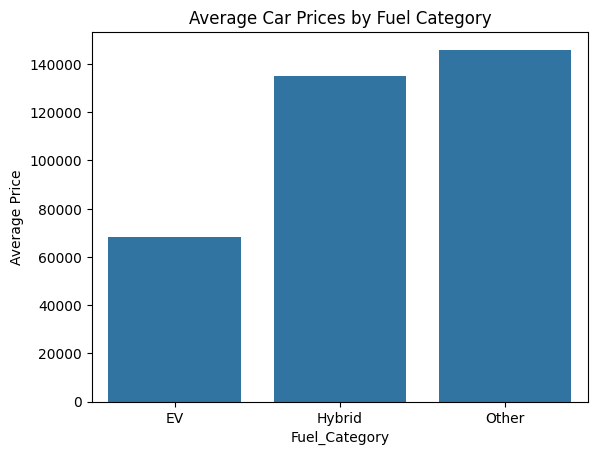

In [100]:
# Check are evs or hybrid more expensive on averages
# Standardize Fuel Types
ev_keywords = ['Electric', 'EV']
hybrid_keywords = ['Hybrid', 'Plug-in']

def fuel_category(fuel):
    if any(word.lower() in str(fuel).lower() for word in ev_keywords):
        return 'EV'
    elif any(word.lower() in str(fuel).lower() for word in hybrid_keywords):
        return 'Hybrid'
    else:
        return 'Other'

df_dropped['Fuel_Category'] = df_dropped['Fuel Types'].apply(fuel_category)

# Compare average prices
avg_prices = df_dropped.groupby('Fuel_Category')['Cars Prices'].mean().sort_values()
print(avg_prices)

sns.barplot(x=avg_prices.index, y=avg_prices.values)
plt.title('Average Car Prices by Fuel Category')
plt.ylabel('Average Price')
plt.show()

Fuel_Category
EV        5.911579
Hybrid    7.126549
Other     7.767764
Name: Performance(0 - 100 )KM/H, dtype: float64


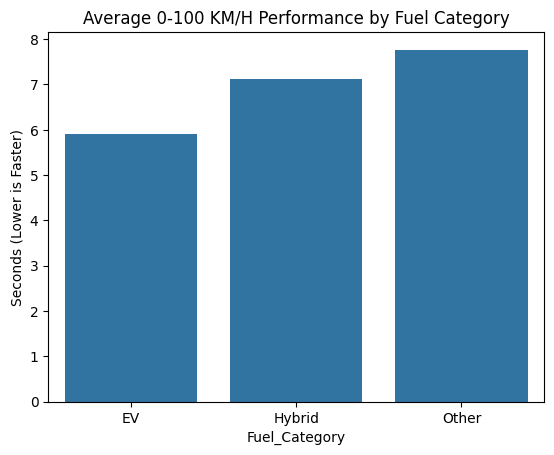

In [101]:
# Which fuel types have the fastest cars
# lower performance value = faster
fastest_fuel = df_dropped.groupby('Fuel_Category')['Performance(0 - 100 )KM/H'].mean().sort_values()
print(fastest_fuel)

sns.barplot(x=fastest_fuel.index, y=fastest_fuel.values)
plt.title('Average 0-100 KM/H Performance by Fuel Category')
plt.ylabel('Seconds (Lower is Faster)')
plt.show()

                Cars Prices  Performance(0 - 100 )KM/H
Company Names                                         
Bugatti        5.870000e+06                   2.400000
ASTON MARTIN   7.529491e+05                   3.527273
LAMBORGHINI    6.500833e+05                   3.037500
FERRARI        5.122222e+05                   3.033333
ROLLS ROYCE    3.924138e+05                   4.913793
ROLLS ROYCE    3.320000e+05                   4.800000
BENTLEY        3.110000e+05                   4.000000
Porsche        1.383896e+05                   4.254167
Volvo          1.100000e+05                  17.111111
Mazda          9.382558e+04                  10.419767


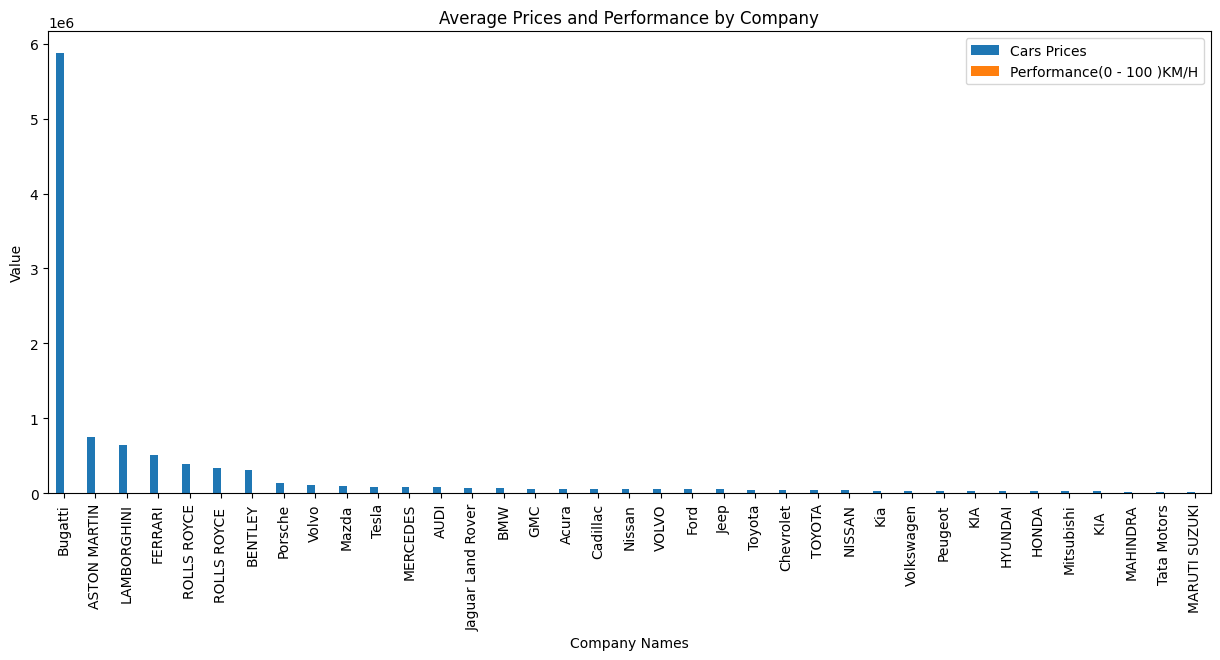

In [102]:
# Avg prices and performance per company names
company_stats = df_dropped.groupby('Company Names')[['Cars Prices', 'Performance(0 - 100 )KM/H']].mean().sort_values(by='Cars Prices', ascending=False)
print(company_stats.head(10))  # Top 10 premium brands

company_stats.plot(kind='bar', figsize=(15, 6))
plt.title('Average Prices and Performance by Company')
plt.ylabel('Value')
plt.show()

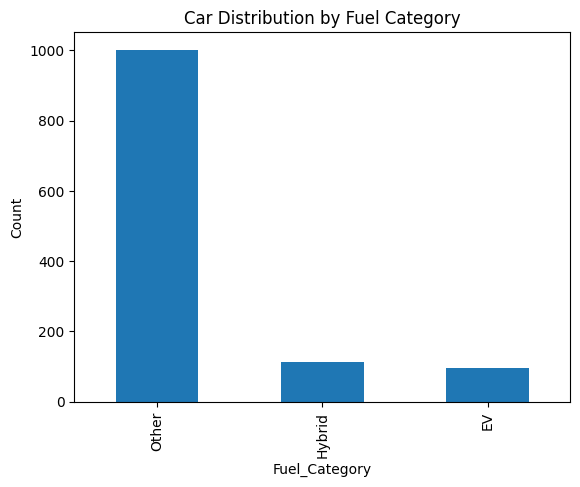

In [103]:
# Car distribution by fuel types and car seats
# Fuel Types Distribution
fuel_counts = df_dropped['Fuel_Category'].value_counts()
fuel_counts.plot(kind='bar')
plt.title('Car Distribution by Fuel Category')
plt.ylabel('Count')
plt.show()

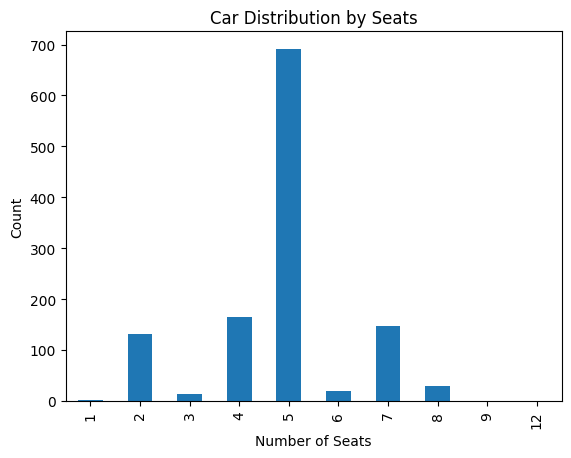

In [104]:
# Seats Distribution
seat_counts = df_dropped['Seats_cleaned'].value_counts().sort_index()
seat_counts.plot(kind='bar')
plt.title('Car Distribution by Seats')
plt.xlabel('Number of Seats')
plt.ylabel('Count')
plt.show()